In [254]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pandas as pd
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv"]
file_time_result_van = "time_van.csv"
file_time_result_dir = "time.csv"
file_time_result_loc = "time_loc.csv"

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams["legend.fontsize"] = 20
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.marker"] = "o"
mpl.rcParams['axes.labelpad'] = 15

red="#ff6751"
orange="#fcb85e"
violet="#bf59cb"
blue="#91e0ed"
green="#52d452"
false_blue="#1f77b4"

dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10241.75, 12491.4, 12852.75, 15302.6, 16810.0, 18531.4, 20102.4, 21598.8, 26936.8, 36549.4, 42958.25])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10805.2, 12467.2, 13817.2, 15067.4, 16781.0, 18342.4, 20847.833333333332, 21748.8, 26632.8, 36096.0, 46382.2])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([10185.75, 11014.0, 11168.6, 11073.0, 11149.4, 11325.8, 11365.2, 11485.0, 12148.4, 13978.6, 17385.6])
dict_keys(['1', '50', '100', '150', '200', '250', '300', '350', '500', '750', '1000'])
dict_values([11036.6, 11570.5, 11560.333333333334, 11246.8, 11188.0, 11454.6, 11499.0, 11643.6, 12332.4, 14359.0, 17755.6])


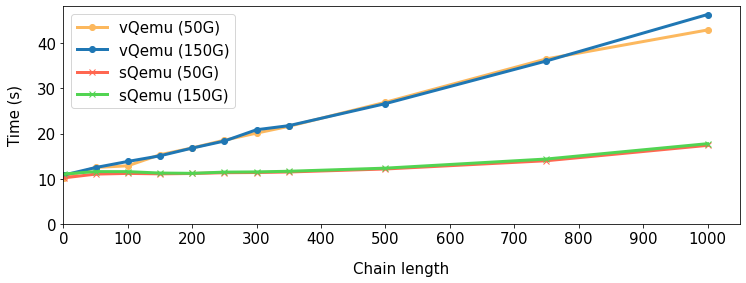

In [369]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import pprint
pp = pprint.PrettyPrinter(indent=4)

RESULTS_PATH="/home/nivek/Documents/results_expes"
VANILLA_FILE_PATH=RESULTS_PATH+"/startup/vanilla/time_van_ms"
DIRECT_FILE_PATH=RESULTS_PATH+"/startup/direct_hack/time_dh_ms"

fig = plt.figure(figsize=plt.figaspect(0.33))

def data_per_disk_from_file(file_path):
    data_per_disk = {}

    with open(file_path, 'r') as datafile:
        lines = datafile.readlines()
        i=0
        snap_nb = -1
        disk_size = -1
        while True:
            unpack_obj = parse.parse("****Snapshots : {} - Disk : {}****\n", lines[i])
            ms = -1
            if unpack_obj != None:
                [snap_nb, disk_size] = unpack_obj
            else:
                unpack_obj = parse.parse("{:d}\n", lines[i])
                if unpack_obj == None: break
                [ms] = unpack_obj

            if disk_size not in data_per_disk.keys():
                data_per_disk[disk_size] = {}

            if snap_nb not in data_per_disk[disk_size].keys():
                data_per_disk[disk_size][snap_nb] = []

            data_per_disk[disk_size][snap_nb] += [ms]


            i += 1
            if i == len(lines):
                break
    return data_per_disk

data_per_disk_vanilla = data_per_disk_from_file(VANILLA_FILE_PATH)
data_per_disk_dh = dpddh= data_per_disk_from_file(DIRECT_FILE_PATH)

nn=0
for k in data_per_disk_vanilla.keys():
    for kk in data_per_disk_vanilla[k].keys():
        data_per_disk_vanilla[k][kk] = sum(data_per_disk_vanilla[k][kk])/len(data_per_disk_vanilla[k][kk])
    dic = data_per_disk_vanilla[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    if nn == 0:
        plt.plot([int(a) for a in dic.keys()], [a/1000 for a in dic.values()], linewidth=3, label="vQemu ("+k+")", marker="o", color=orange)
    else:
        plt.plot([int(a) for a in dic.keys()], [a/1000 for a in dic.values()], linewidth=3, label="vQemu ("+k+")", marker="o", color=false_blue)
        
    nn += 1

nn=0
for k in dpddh.keys():
    for kk in dpddh[k].keys():
        dpddh[k][kk] = sum(dpddh[k][kk])/len(dpddh[k][kk])
    dic = dpddh[k]
    pp.pprint(dic.keys())
    pp.pprint(dic.values())
    if nn == 0:
        plt.plot([int(a) for a in dic.keys()], [a/1000 for a in dic.values()], linewidth=3, label="sQemu ("+k+")", marker="x", color=red)
    else:
        plt.plot([int(a) for a in dic.keys()], [a/1000 for a in dic.values()], linewidth=3, label="sQemu ("+k+")", marker="x", color=green)
    nn += 1

    
plt.xlabel("Chain length", fontsize=15)
plt.ylabel("Time (s)", fontsize=15)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xticks(range(0, 1100, 100), fontsize=15)
plt.yticks(fontsize=15)

plt.gca().xaxis.set_major_locator(MaxNLocator(11))
plt.legend(loc="upper left", fontsize=15)

plt.savefig("figs/startup_duration.pdf", format="pdf", bbox_inches="tight")
plt.show()

171872 0 100 173407
171872 173407 100 ---
172492 128416 132 299285
300908 299285 132 ---
171959 7434568 586 689807
7606527 689807 586 ---
[171872 172492 171959] ==
[      0  128416 7434568] ==
[100, 132, 586] ==


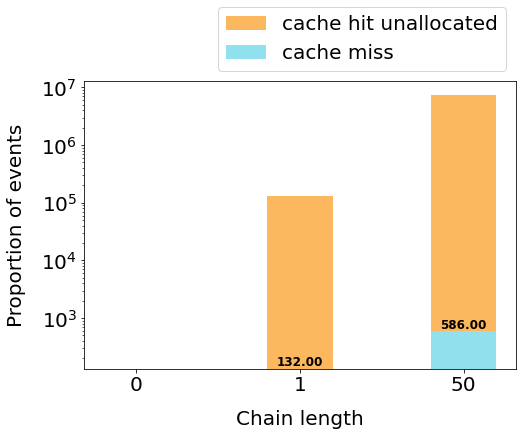

------------------------------------
170917 0 100 173349
170917 173349 100 ---
171186 127452 152 301266
298638 301266 152 ---
172580 170491 544 346146
343071 346146 544 ---
173677 171845 1197 356328
345522 356328 1197 ---
174618 172533 1538 364716
347151 364716 1538 ---
[170917 171186 172580 173677 174618] ==
[     0 127452 170491 171845 172533] ==
[100, 152, 544, 1197, 1538] ==


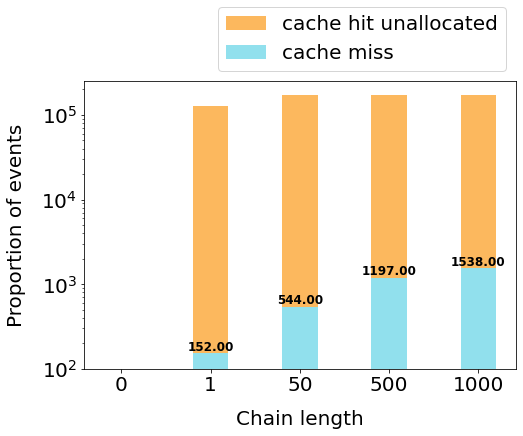

<ipython-input-255-4e3e8dc28996>:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1", "50", "500", "1000"])


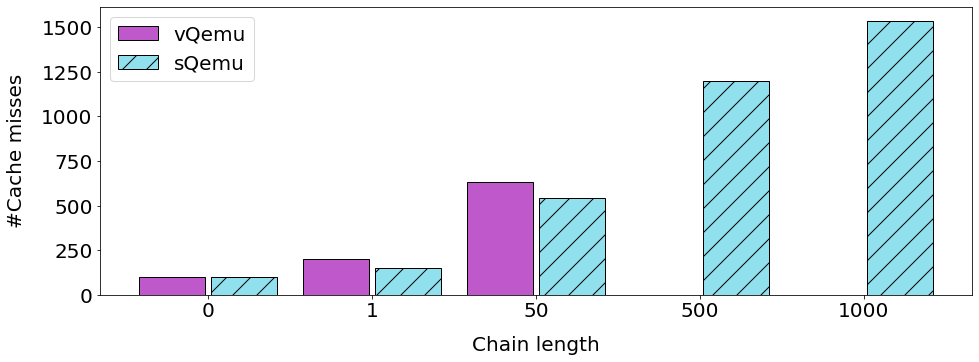

<ipython-input-255-4e3e8dc28996>:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1", "50", "500", "1000"])


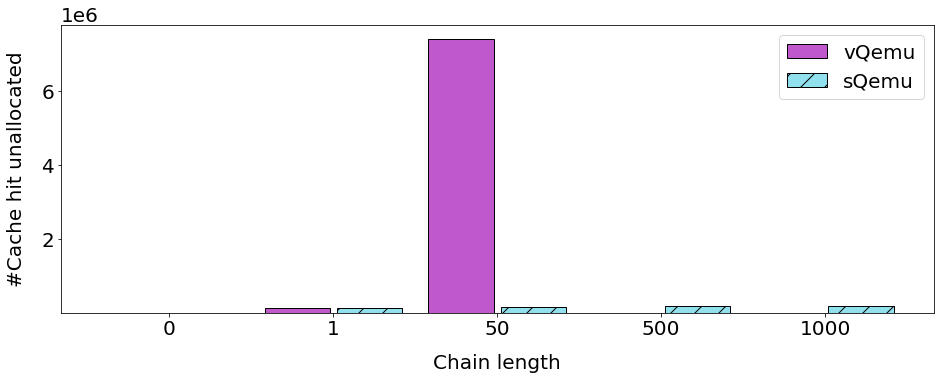

In [255]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

MICRO_METRICS_DIR = "/home/nivek/Downloads/"
files_results_vanilla = ["vanilla0.csv", "vanilla1.csv", "vanilla50.csv"]
files_results_direct = ["direct0.csv", "direct1.csv", "direct50.csv", "direct500.csv", "direct1000.csv"]

def get_data(files):
    n = []
    u = []
    cm = []
    cr = []
    cols = []
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

#         with open(CSV_FILE, 'r') as datafile :
#             csvreader = csv.reader(datafile, delimiter=';', quotechar='|')
#             for row in csvreader:
#                 datas += [row]
#         df = pd.DataFrame(datas, columns=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
    #     #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
#         datan = df[df.event == "NORMAL"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datan)
#         datau = []
#         if len(df[df.event == "UNALLOCATED"]) > 0:
#             datau = df[df.event == "UNALLOCATED"].groupby(["snapshot_id", "offset"])["offset"].agg(np.size).groupby('snapshot_id').agg(np.size).to_dict()
#         print(datau)
        nn = len(df[df.event == "NORMAL"])
        uu = len(df[df.event == "UNALLOCATED"])
        cmm = len(df[df.event == "CACHE_MISSED"])
        crr = len(df[df.event == "CACHE_REQ"])
        print(nn, uu, cmm, crr)
#         n += [100*nn/(nn+uu)]
#         u += [100*uu/(nn+uu)]
#         cm += [100*cmm/crr]
#         cr += [100*(crr-cmm)/crr]
        n += [nn]
        u += [uu]
        cm += [cmm]
        cr += [crr-cmm]
        print(nn+uu, crr, cmm, "---")

        del datas
        del temp
        del df
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(len(cols))
    #n, u = np.array(n)*np.array(cr)/100, np.array(u)*np.array(cr)/100
    n, u = np.array(n), np.array(u)
#     if "vanilla" in file[:-4]:
#         cm = [1648, 2506, 4600]
    #ax.bar(X+0.0, n, width=0.4, color=green)
    ax.bar(X+0.0, u, width=0.4, color=orange, bottom=cm)
    ax.bar(X+0.0, cm, width=0.4, color=blue)
#     ax.bar(X+0.47, cr, width=0.47, bottom=cm)
    ax.legend(labels=["cache hit unallocated", "cache miss", "cache hit"], loc="lower right", bbox_to_anchor=(1,1))
    print(n, "==")
    print(u, "==")
    print(cm, "==")
    ax.set_xticks(X)
    for i, e in enumerate(cols):
        cols[i] = cols[i].replace("vanilla", "").replace("direct", "")
    ax.set_xticklabels(cols)
    ax.set_xlabel("Chain length")
    ax.set_ylabel("Proportion of events")
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(100))
    
    rects = ax.patches
    
    # Make some labels.
    tt = u.tolist() + cm #+ cr
    for i, rect in enumerate(rects):
        label = tt[i]
        label = "{:.2f}".format(label) if label > 0 else "0"
        height = rect.get_height()
        
        if i < len(tt)//3: #  blue
#             ax.text(
#                 rect.get_x() + rect.get_width()/2, rect.get_y(), label, ha="center", va="bottom",
#                 fontsize=10
#             )
            pass
        elif i < 2*len(tt)//3: # orange
#             ax.text(
#                 rect.get_x() + rect.get_width()*1.5, rect.get_y() + height - 10, label, ha="center", va="bottom",
#                 fontsize=10, color="orange"
#             )
            pass
        else: # green
            ax.text(
                rect.get_x() + rect.get_width()/2, rect.get_y() + height, label, ha="center", va="bottom",
                fontsize=12, color="black", fontweight="bold"
            )
    
    plt.yscale('log')
    plt.savefig("figs/number_events_per_chain_"+file[0:2]+".pdf", format="pdf", bbox_inches="tight")
    plt.show()
    return [u, cm]

values_van = get_data(files_results_vanilla)
print("------------------------------------")
values_dir = get_data(files_results_direct)
values_van[1][1] = 203
values_van[1][2] = 630

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


fig = plt.figure(figsize=plt.figaspect(0.33))
ax = fig.add_axes([0,0,1,1])

X=np.arange(5)
ax.bar(X-0.22, values_van[1]+[0, 0], width=0.4, label="vQemu", color=violet, edgecolor="black")
ax.bar(X+0.22, values_dir[1], width=0.4, label="sQemu", color=blue, hatch="/", edgecolor="black")

ax.set_xticklabels(["0", "1", "50", "500", "1000"])
ax.set_xticks(X)
ax.set_xlabel("Chain length")
ax.set_ylabel("#Cache misses")

# legend_elements = [
#                     Patch(facecolor="w", edgecolor='black', hatch="*", label='#unallocated'),
#                     Patch(facecolor="w", edgecolor='black', hatch="-", label='#cache miss'),
#                     Patch(facecolor=violet, label='vQemu'),
#                     Patch(facecolor=orange, label='sQemu')
#                   ]
# ax.legend(handles=legend_elements, bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
ax.legend()
plt.savefig("figs/number_cm_per_chain_all.pdf", format="pdf", bbox_inches="tight")
plt.show()

#
#
# 
# 
# Cache hit unallocated
fig = plt.figure(figsize=plt.figaspect(0.33))
ax = fig.add_axes([0,0,1,1])

X=np.arange(5)
ax.bar(X-0.22, values_van[0].tolist()+[0, 0], width=0.4, label="vQemu", color=violet, edgecolor="black")
ax.bar(X+0.22, values_dir[0], width=0.4, label="sQemu", color=blue, hatch="/", edgecolor="black")

ax.set_xticklabels(["0", "1", "50", "500", "1000"])
ax.set_xticks(X)
ax.set_xlabel("Chain length")
ax.set_ylabel("#Cache hit unallocated")


plt.ylim(ymin=1)
# legend_elements = [
#                     Patch(facecolor="w", edgecolor='black', hatch="*", label='#unallocated'),
#                     Patch(facecolor="w", edgecolor='black', hatch="-", label='#cache miss'),
#                     Patch(facecolor=violet, label='vQemu'),
#                     Patch(facecolor=orange, label='sQemu')
#                   ]
# ax.legend(handles=legend_elements, bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
ax.legend()
plt.savefig("figs/number_unal_per_chain_all.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Events per snapshot given a single chain during a workload

51
------------------------------------
46
D


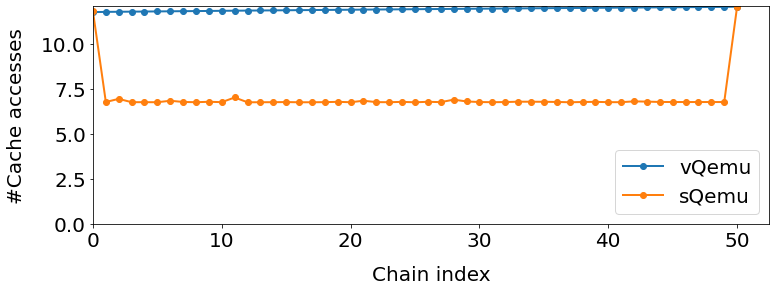

In [256]:
# echelle logarithm on y pour bien voir les données

def get_data(files):
    vals = []
    cols = []

    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        cols += [file[:-4]]
        datas = []

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "offset", "snapshot_id", "l1_index", "l2_offset"])
        df = pd.concat(temp, ignore_index=True)
        
        df["offset"] = pd.to_numeric(df["offset"])
        df["l2_offset"] = pd.to_numeric(df["l2_offset"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
        df["l1_index"] = pd.to_numeric(df["l1_index"])
        #data = df[df.event == "NORMAL"].groupby(["snapshot_id"]).agg(np.size)["event"].to_dict()
        data = df[ (df.event == "NORMAL") | (df.event == "UNALLOCATED") ] \
            .groupby(["snapshot_id"])["snapshot_id"].count()
        print(len(data))
        if "direct" in file[:-6]:
            if len(data) < 50:
                tmp = data[len(data)-1]
                print("D")
                for i in range(len(data)-1, 50):
                    data[i]=np.median(data)
                data[50] = tmp
            elif len(data) < 500:
                tmp = data[len(data)-1]
                print("D")
                for i in range(len(data)-1, 500):
                    data[i]=np.median(data)
                data[500] = tmp
        label = "sQemu" if "direct" in file[:-6] else "vQemu"
        plt.plot(np.log(data), label=label)
        
        plt.xlabel("Chain index")
        plt.ylabel("#Cache accesses")
        plt.ylim(ymin=0)
        plt.xlim(xmin=0)
        plt.legend(loc="lower right")
        
        del datas
        del temp
        del df

fig = plt.figure(figsize=plt.figaspect(0.33))
get_data(["vanilla50.csv"])
print("------------------------------------")
get_data(["direct50.csv"])

plt.savefig("figs/clusters_accesses_chain_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

# get_data(["vanilla500.csv"])
# print("------------------------------------")
# get_data(["direct500.csv"])
# plt.savefig("figs/clusters_accesses_chain_500.pdf", format="pdf", bbox_inches="tight")

### Memory footprint _and_ Throughput

<ipython-input-352-d92cc5bcaf52>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["chain_length"].unique())


  workload        version  chain_length       memory  dd_throughput
0       dd  direct-access             0  4152.250000     553.500000
1       dd  direct-access             1  4151.500000     351.000000
2       dd  direct-access            50  4166.500000     315.750000
3       dd  direct-access           500  4258.500000     310.500000
4       dd  direct-access          1000  4354.250000     301.500000
5       dd        vanilla             0  4121.400000     519.200000
6       dd        vanilla             1  4126.200000     330.000000
7       dd        vanilla            50  4371.166667     305.000000
8       dd        vanilla           500  6561.500000     105.716667
9       dd        vanilla          1000  8643.086000      48.600000


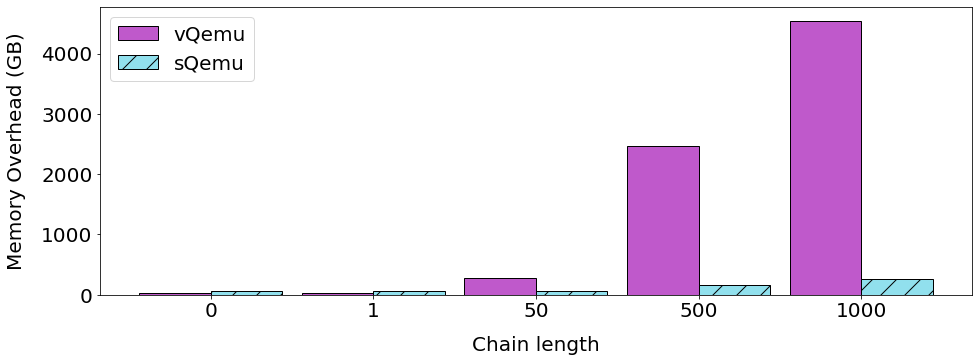

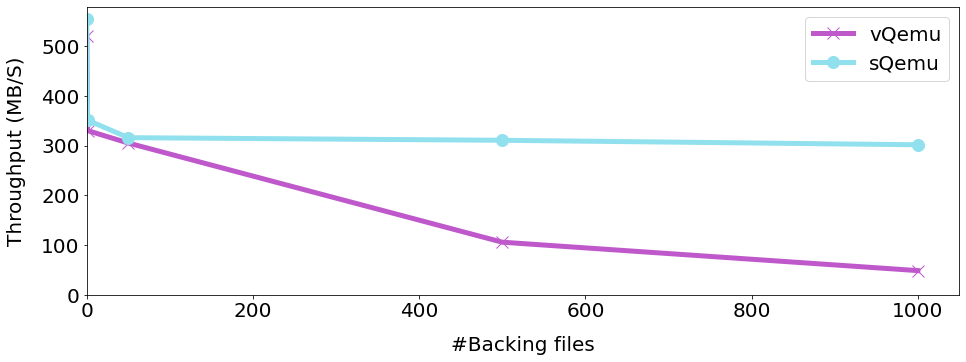

In [352]:
memory_footprint_file = "~/Downloads/memory_footprint.csv"

df = pd.DataFrame()
temp = pd.read_csv(memory_footprint_file, iterator=True, chunksize=900000, delimiter=",")
df = pd.concat(temp, ignore_index=True)

fig = plt.figure(figsize=plt.figaspect(0.33))
ax = fig.add_axes([0,0,1,1])

X=np.arange(5)
ax.bar(X-0.22, df[df.version == "vanilla"]["memory"].to_numpy()-4096, width=0.44, label="vQemu", color=violet, edgecolor="black")
ax.bar(X+0.22, df[df.version != "vanilla"]["memory"].to_numpy()-4096, width=0.44, label="sQemu", color=blue, edgecolor="black", hatch="/")

ax.set_xticklabels(df["chain_length"].unique())
ax.set_xticks(X)

plt.xlabel("Chain length")
plt.ylabel("Memory Overhead (GB)")
plt.legend()
plt.savefig("figs/memory_consumption.pdf", format="pdf", bbox_inches="tight")

################################################################################################

fig = plt.figure(figsize=plt.figaspect(0.33))
ax= fig.add_axes([0,0,1,1])

X=df["chain_length"].unique()

ax.plot(X, df[df.version == "vanilla"]["dd_throughput"].to_numpy(), label="vQemu", color=violet, marker="x", linewidth=5, ms=12)
ax.plot(X, df[df.version != "vanilla"]["dd_throughput"].to_numpy(), label="sQemu", color=blue, marker="o", linewidth=5, ms=12)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
 # bar here
plt.xlabel("#Backing files")
plt.ylabel("Throughput (MB/S)")
plt.legend()
plt.savefig("figs/workload_dd_throughput.pdf", format="pdf", bbox_inches="tight")

print(df)

## Evolution of mean time for hits and misses

MISSED  ==>
Max:  3264 Median:  34.0 ,Min:  4
MISSED  ==>
Max:  4082 Median:  36.0 ,Min:  4
MISSED  ==>
Max:  60304 Median:  525.0 ,Min:  12
MISSED  ==>
Max:  41628002 Median:  360.0 ,Min:  5


<ipython-input-278-70843690f0e3>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "vQemu 0", "sQemu 0","", "vQemu 100", "sQemu 100"])


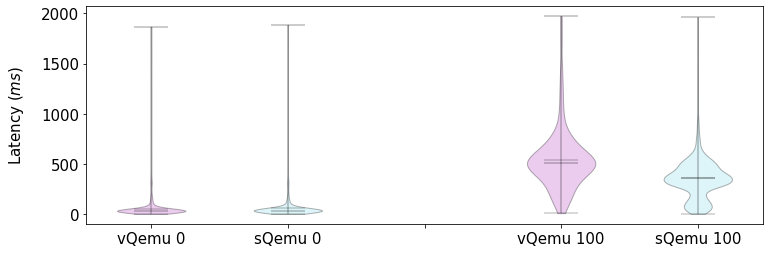

HIT  ==>
Max:  78101365 Median:  2.0 ,Min:  2
HIT  ==>
Max:  77352021 Median:  2.0 ,Min:  2
HIT  ==>
Max:  127335421 Median:  160.0 ,Min:  2
HIT  ==>
Max:  95049737 Median:  4.0 ,Min:  2


<ipython-input-278-70843690f0e3>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "vQemu 0", "sQemu 0","", "vQemu 100", "sQemu 100"])


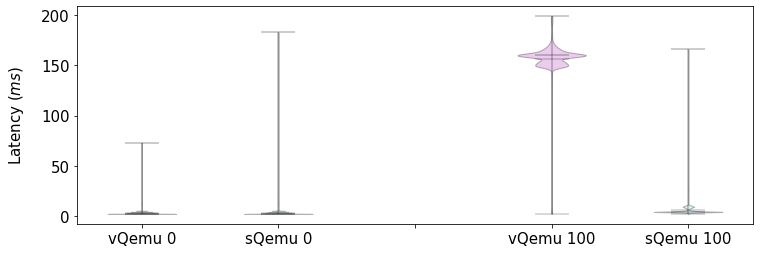

MISSED  ==>
Max:  4179 Median:  37.0 ,Min:  7
MISSED  ==>
Max:  3684 Median:  49.0 ,Min:  27
MISSED  ==>
Max:  107262 Median:  488.0 ,Min:  6
MISSED  ==>
Max:  41010076 Median:  274.0 ,Min:  4


<ipython-input-278-70843690f0e3>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "vQemu 0", "sQemu 0","", "vQemu 100", "sQemu 100"])


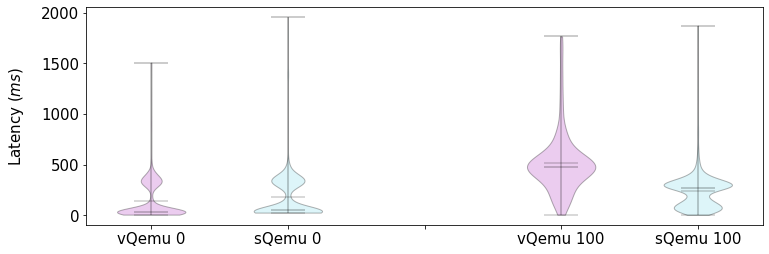

HIT  ==>
Max:  66953318 Median:  2.0 ,Min:  2
HIT  ==>
Max:  75175382 Median:  3.0 ,Min:  2
HIT  ==>
Max:  116295025 Median:  160.0 ,Min:  2
HIT  ==>
Max:  45973671 Median:  4.0 ,Min:  2


<ipython-input-278-70843690f0e3>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "vQemu 0", "sQemu 0","", "vQemu 100", "sQemu 100"])


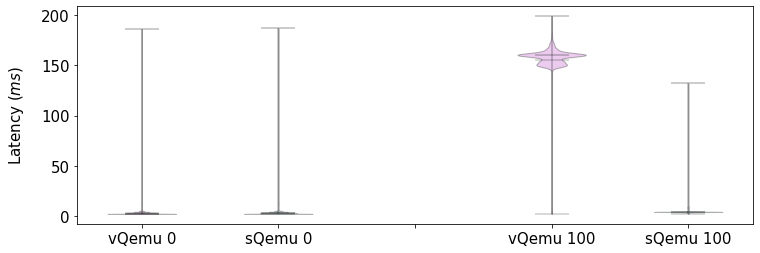

In [278]:

def get_data(files, event):
    
    val = []
    ext = ""
    
    fig, ax = plt.subplots(figsize=plt.figaspect(0.33))
    
    for file in files:
        CSV_FILE = MICRO_METRICS_DIR + file 
        ext = file[:-4][-3:]

        df = pd.DataFrame()
        temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=";",
                          names=["event", "snapshot_id", "time"])
        df = pd.concat(temp, ignore_index=True)

        df["time"] = pd.to_numeric(df["time"])
        df["snapshot_id"] = pd.to_numeric(df["snapshot_id"])
    
        data = df[ (df.event == "UNALLOCATED_"+event) ]["time"]
        print(event, " ==>")
        print("Max: ", data.max(),"Median: ", data.median(),",Min: ", data.min())
        print("============================")
        if event == "HIT":
            data = data[data < 200]
        else:
            data = data[data < 2000]
            #data = np.log(data)
            
        val += [data]
        del temp
        del df
    #ax.boxplot(val)
    pos = [1, 2, 4, 5]
    parts = ax.violinplot(val, pos, points=1000, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      )
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ut=0
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        vp = parts[partname]
        if ut % 2 == 0:
            vp.set_edgecolor("black")
            vp.set_linewidth(0.4)
        else:
            vp.set_edgecolor("black")
            vp.set_linewidth(0.3)
        ut += 1
    ut = 0
    for pc in parts['bodies']:
        if ut % 2 == 0:
            pc.set_facecolor(violet)
            pc.set_edgecolor('black')
        else:
            pc.set_facecolor(blue)
            pc.set_edgecolor('black')
        ut += 1
#     plt.ylabel(r"Cache "+event[0:4].capitalize()+" latency ($ms$)")
    plt.ylabel(r"Latency ($ms$)", fontsize=15)
    
    ax.set_xticklabels(["", "vQemu 0", "sQemu 0","", "vQemu 100", "sQemu 100"])
    ax.tick_params(axis='both', which='major')
    
    plt.savefig("figs/"+event+"_time_"+ext+".pdf", format="pdf", bbox_inches="tight")
    plt.show()
# time for snapshot 100

get_data(["base_van_hdd.csv", "base_direct_hdd.csv", "time_van_100_hdd.csv", "time_direct_100_hdd.csv"], "MISSED")
get_data(["base_van_hdd.csv", "base_direct_hdd.csv", "time_van_100_hdd.csv", "time_direct_100_hdd.csv"], "HIT")



get_data(["base_van_ssd.csv", "base_direct_ssd.csv", "time_van_100_ssd.csv", "time_direct_100_ssd.csv"], "MISSED")
get_data(["base_van_ssd.csv", "base_direct_ssd.csv", "time_van_100_ssd.csv", "time_direct_100_ssd.csv"], "HIT")

/home/nivek/Downloads/fio_cache
{'vanilla': [88.0, 393.0, 456.0, 376.0, 402.0, 431.0, 411.0, 508.0, 678.0, 988.0, 1088.0, 1178.0, 1228.0], 'direct': [2850.0, 3000.0, 3050.0, 4323.0, 4426.0, 5208.0, 5553.0, 5373.0, 5150.0, 5418.0, 5387.0, 5700.0, 6000.0]}


<ipython-input-273-720f8d98d9f9>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


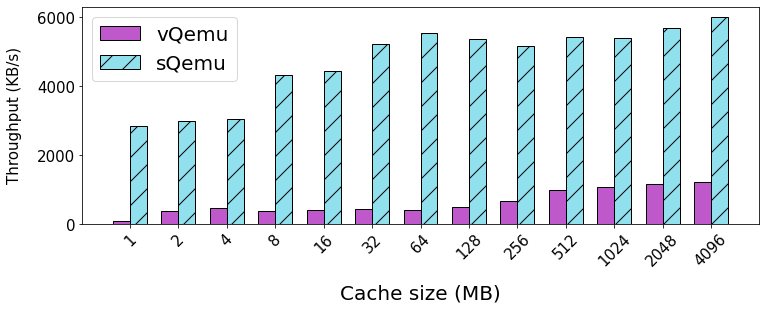

In [273]:
file1="/home/nivek/Downloads/dd_cache_none_4K"
file2="/home/nivek/Downloads/dd_cache_writethrough_4K"
file3="/home/nivek/Downloads/dd_cache_none_2K"
file4="/home/nivek/Downloads/dd_cache_writethrough_2K"
file5="/home/nivek/Downloads/fio_cache"

def plot(file, t=True):
    
    fig, ax = plt.subplots(figsize=plt.figaspect(0.33))
    with open(file, 'r') as datafile:
        lines = datafile.readlines()
        t = ""
        datas = {"vanilla": [], "direct": []}
        for line in lines:
            if "vanilla" in line:  t="vanilla"
            elif "direct" in line: t="direct"
            else:
                datas[t] += [float(line.split()[0])]
        print(file)
        print(datas)
        
        X = np.arange(13)*2
        xx = ["1", "2", "4", "8", "16", "32", "64", "128", "256", "512", "1024", "2048", "4096"]
        plt.bar(X-0.35, datas["vanilla"], width=0.7, label="vQemu", color=violet,edgecolor="black")
        plt.bar(X+0.35, datas["direct"], width=0.7, label="sQemu", color=blue, edgecolor="black", hatch="/")
        plt.ylim(ymin=0)
        plt.ylabel("Throughput (KB/s)", fontsize=15)
        plt.xlabel("Cache size (MB)")
        plt.legend()
        plt.xticks(rotation=45)
        #plt.xlim(xmin=0)
        ax.set_xticklabels(xx)
        plt.xticks(X, fontsize=15)
        plt.yticks(fontsize=15)
        plt.savefig("figs/cache_variation.pdf", format="pdf", bbox_inches="tight")

# plot(file1)
# plt.show()
# plot(file2)
# plt.show()
# plot(file3)
# plt.show()
# plot(file4)
plot(file5)


# only vanilla base
# nfs without cache
# or drop cache everytime on nfs server
# use another workload for random read (like fio)
# test 512K
# how to partitoin real workloadc in rocksdb
# calculate taux de duplication with ponderation

# fio --filename=/dev/XXX --direct=1 --rw=randread --randrepeat=1 percentage_random=70 \               
#    --ioengine=libaio --bs=4k --iodepth=32 --numjobs=1 --size=20G \             
#    --name=randread.4k.out --runtime=180
            

real_dupli


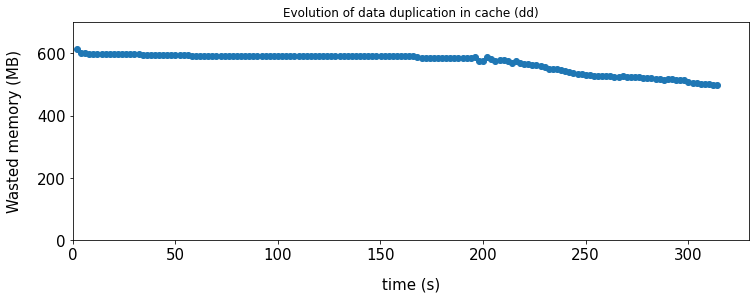

In [219]:

def get_data(file):
    
    val = []
    ext = ""
    
    fig, ax = plt.subplots(figsize=plt.figaspect(0.33))
    
    CSV_FILE = MICRO_METRICS_DIR + file 
    ext = file[:-4]
    print(ext)

    df = pd.DataFrame()
    temp = pd.read_csv(CSV_FILE, iterator=True, chunksize=900000, delimiter=",",
                      names=["time", "nb_dup", "per_dup"])
    df = pd.concat(temp, ignore_index=True)
    
    X=df["time"]

    ax.plot(X/5, df["per_dup"].to_numpy()*100*7, label="Percentage duplication")
    plt.xlim(xmin=0)
    plt.ylim(ymin=0, ymax=700)
     # bar here
    plt.xlabel("time (s)", fontsize=15)
    plt.ylabel("Wasted memory (MB)", fontsize=15)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("figs/dupli_memory.pdf", format="pdf", bbox_inches="tight")
    plt.title("Evolution of data duplication in cache (dd)")

get_data("real_dupli.csv")

<ipython-input-328-995cbef68c25>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


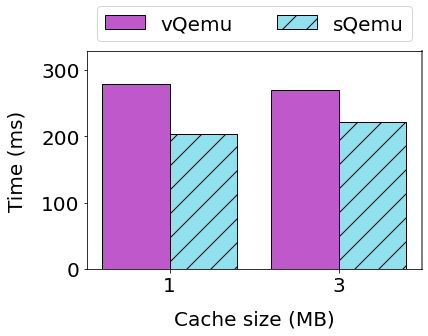

<ipython-input-328-995cbef68c25>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


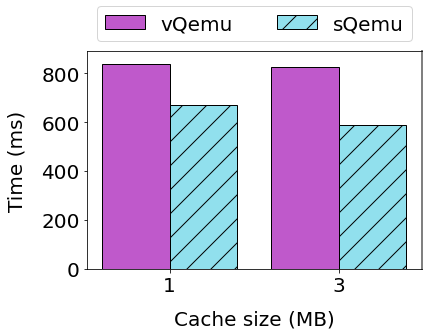

<ipython-input-328-995cbef68c25>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


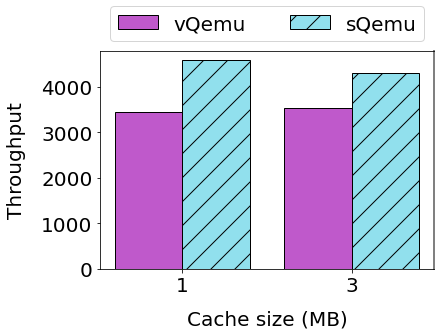

<ipython-input-328-995cbef68c25>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


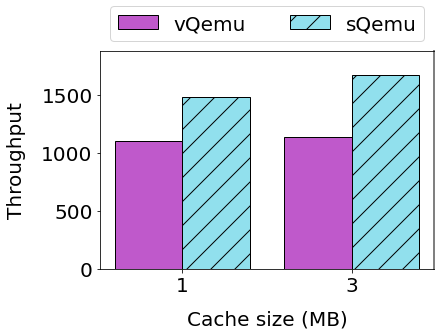

<ipython-input-328-995cbef68c25>:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


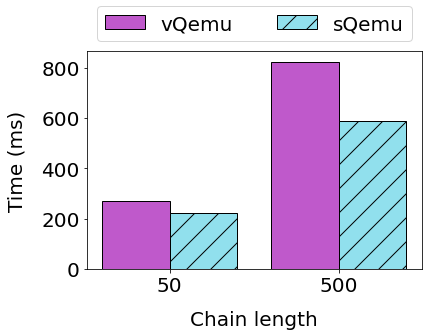

<ipython-input-328-995cbef68c25>:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


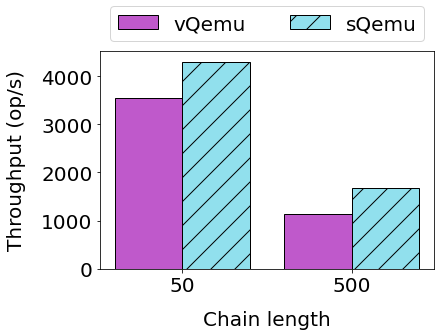

In [328]:
# YCSB-C


rocksdb_through ={
    "1792":{ 
        "vanilla": {
            "50": [3474,3458, 3547, 3456, 3270 ],
            "500": [ 1110,1095, 1092,1119, 1094  ]
        },
        "direct": {
            "50": [4691,4709, 4340, 4454, 4722],
            "500": [1408,1366, 1573, 1358, 1692 ]
        }
    },
    "3584":{ 
        "vanilla": {
            "50": [ 3984, 3631, 3575, 3269, 3223, 3724, 3256, 3668 ],
            "500": [ 1128, 1145, 1114, 1126, 1121, 1136, 1170 ]
        },
        "direct": {
            "50": [ 4077, 4763, 4085, 4189, 4206, 4748, 4034 ],
            "500": [ 1686, 1661, 1701, 1685, 1662, 1652, 1682 ]
        }
    },
}

rocksdb_time ={
    "1792":{ 
        "vanilla": {
            "50": [277,277 , 270, 272, 295 ],
            "500": [804, 857,850, 833, 856]
        },
        "direct": {
            "50": [199, 196, 219, 209, 196 ],
            "500": [702, 724, 626, 728, 576 ]
        }
    },
    "3584":{ 
        "vanilla": {
            "50": [ 239, 265, 266, 291, 290, 257, 295, 260 ],
            "500": [828, 809, 834, 838, 835, 823, 801, ]
        },
        "direct": {
            "50": [ 235, 199, 231, 227, 223, 197, 236,  ],
            "500": [ 584, 593, 579, 585, 597, 597, 585,  ]
        }
    },
}

X = np.arange(2)
xx = ["1", "3"]

# time
for chainl in ["50", "500"]:
    
    # getting mean time
    fig, ax = plt.subplots()
    datas = {}
    datas["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"][chainl]) for a in rocksdb_time]
    datas["direct"] = [ np.mean(rocksdb_time[a]["direct"][chainl]) for a in rocksdb_time]

    g = ax.bar(X-0.2, datas["vanilla"], width=0.4, label="vQemu", color=violet, edgecolor='black')
    h = ax.bar(X+0.2, datas["direct"], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")
    plt.ylim(ymin=0, ymax=max(datas["vanilla"]+ datas["direct"])+50)
    plt.ylabel("Time (ms)")
    
    ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
    
    ax.set_xticklabels(xx)
    ax.set_xticks(X)
    
#     for i, rect in enumerate(ax.patches):
#         label = (datas["vanilla"]+datas["direct"])[i]
#         label = "{:.0f}".format(label) if label > 0 else ""
#         height = rect.get_height()
        
#         ax.text(
#             rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", fontsize=15,
#             fontweight="bold"
#         )
        
    ax.set_xlabel("Cache size (MB)")
    ax.spines["right"].set_linewidth(2)
    ax.spines["right"].set_color("gray")
    plt.savefig("figs/rocksdb_time_chain"+chainl+".pdf", format="pdf", bbox_inches="tight")
    plt.show()

# throughput
for chainl in ["50", "500"]:
    
    fig, ax = plt.subplots()
    datas = {}
    datas["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"][chainl]) for a in rocksdb_time]
    datas["direct"] = [ np.mean(rocksdb_through[a]["direct"][chainl]) for a in rocksdb_time]

    g = ax.bar(X-0.2, datas["vanilla"], width=0.4, label="vQemu", color=violet, edgecolor='black')
    h = ax.bar(X+0.2, datas["direct"], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")
    plt.ylim(ymin=0, ymax=max(datas["vanilla"]+ datas["direct"])+200)
    plt.ylabel("Throughput")
    
    ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
    
    ax.set_xticklabels(xx)
    ax.set_xticks(X)
    
#     for i, rect in enumerate(ax.patches):
#         label = (datas["vanilla"]+datas["direct"])[i]
#         label = "{:.0f}".format(label) if label > 0 else ""
#         height = rect.get_height()
        
#         ax.text(
#             rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", fontsize=15,
#             fontweight="bold"
#         )
        
    ax.set_xlabel("Cache size (MB)")
    ax.spines["right"].set_linewidth(2)
    ax.spines["right"].set_color("gray")
    plt.savefig("figs/rocksdb_ops_chain"+chainl+".pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
#
# length chain on the same graph
#
print("===================================================================")
X = np.arange(2)
xx = ["50", "500"]

# time
fig, ax = plt.subplots()
datas = {}
datas["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"]["50"]) for a in rocksdb_time]
datas["direct"] = [ np.mean(rocksdb_time[a]["direct"]["50"]) for a in rocksdb_time]

datas2 = {}
datas2["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"]["500"]) for a in rocksdb_time]
datas2["direct"] = [ np.mean(rocksdb_time[a]["direct"]["500"]) for a in rocksdb_time]

g = ax.bar(X-0.2, [datas["vanilla"][1]]+[datas2["vanilla"][1]], width=0.4, label="vQemu", color=violet, edgecolor='black')
h = ax.bar(X+0.2, [datas["direct"][1]]+[datas2["direct"][1]], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")

plt.ylabel("Time (ms)")

ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)

ax.set_xticklabels(xx)
ax.set_xticks(X)

ax.set_xlabel("Chain length")
plt.savefig("figs/rocksdb_only_time.pdf", format="pdf", bbox_inches="tight")
plt.show()

# throuhgput
fig, ax = plt.subplots()
datas = {}
datas["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"]["50"]) for a in rocksdb_through]
datas["direct"] = [ np.mean(rocksdb_through[a]["direct"]["50"]) for a in rocksdb_through]

datas2 = {}
datas2["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"]["500"]) for a in rocksdb_through]
datas2["direct"] = [ np.mean(rocksdb_through[a]["direct"]["500"]) for a in rocksdb_through]

g = ax.bar(X-0.2, [datas["vanilla"][1]]+[datas2["vanilla"][1]], width=0.4, label="vQemu", color=violet, edgecolor='black')
h = ax.bar(X+0.2, [datas["direct"][1]]+[datas2["direct"][1]], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")

plt.ylabel("Throughput (op/s)")

ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)

ax.set_xticklabels(xx)
ax.set_xticks(X)

ax.set_xlabel("Chain length")
plt.savefig("figs/rocksdb_only_through.pdf", format="pdf", bbox_inches="tight")
plt.show()

<ipython-input-330-2d26475f417f>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


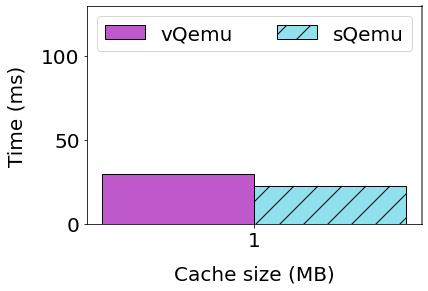

<ipython-input-330-2d26475f417f>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


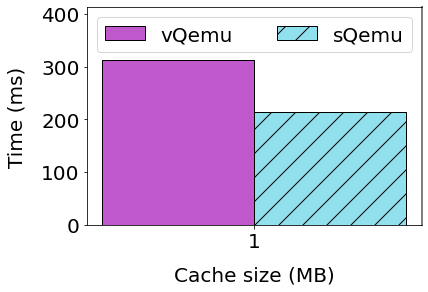

<ipython-input-330-2d26475f417f>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


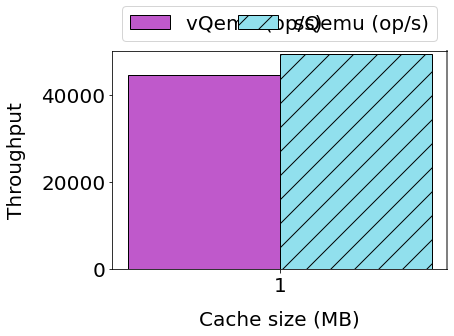

<ipython-input-330-2d26475f417f>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


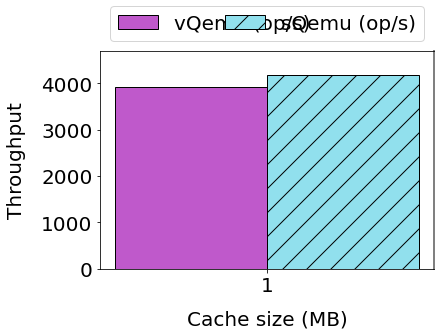

<ipython-input-330-2d26475f417f>:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


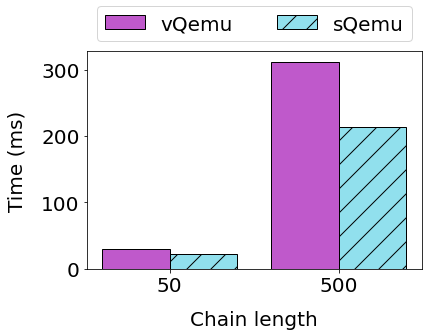

<ipython-input-330-2d26475f417f>:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xx)


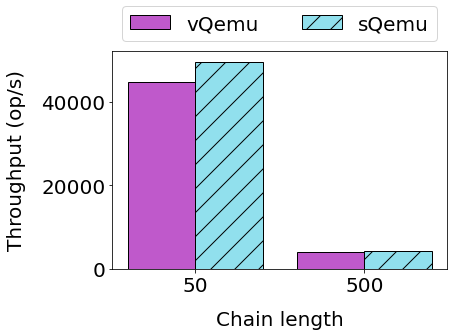

In [330]:
# YCSB-D


rocksdb_time ={
    "1792":{ 
        "vanilla": {
            "50": [ 21+29/2, 15+19/2, 18+27/2, 16+21/2 ],
            "500": [ 191+385/2, 26/2+243, 166+399/2, 219+50/2 ]
        },
        "direct": {
            "50": [ 11+21/2, 14+20/2, 11+21/2, 13+21/2 ],
            "500": [ 220, 209 ]
        }
    },
}

rocksdb_through ={
    "1792":{ 
        "vanilla": {
            "50": [ 34831, 50260, 45977, 47746 ],
            "500": [ 4089, 3789, 3862 ]
        },
        "direct": {
            "50": [ 50973, 50900, 66728, 29570 ],
            "500": [ 4190 ]
        }
    },
}


X = np.arange(1)
xx = ["1"]

# time
for chainl in ["50", "500"]:
    
    # getting mean time
    fig, ax = plt.subplots()
    datas = {}
    datas["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"][chainl]) for a in rocksdb_time]
    datas["direct"] = [ np.mean(rocksdb_time[a]["direct"][chainl]) for a in rocksdb_time]

    g = ax.bar(X-0.2, datas["vanilla"], width=0.4, label="vQemu", color=violet, edgecolor='black')
    h = ax.bar(X+0.2, datas["direct"], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")
    plt.ylim(ymin=0, ymax=max(datas["vanilla"]+ datas["direct"])+100)
    plt.ylabel("Time (ms)")
    
    ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
    
    ax.set_xticklabels(xx)
    ax.set_xticks(X)
    
#     for i, rect in enumerate(ax.patches):
#         label = (datas["vanilla"]+datas["direct"])[i]
#         label = "{:.0f}".format(label) if label > 0 else ""
#         height = rect.get_height()
        
#         ax.text(
#             rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", fontsize=15,
#             fontweight="bold"
#         )
        
    ax.set_xlabel("Cache size (MB)")
    ax.spines["right"].set_linewidth(2)
    ax.spines["right"].set_color("gray")
    plt.savefig("figs/rocksdb_time_chain"+chainl+"-ycsb-d.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# throughput
for chainl in ["50", "500"]:
    
    fig, ax = plt.subplots()
    datas = {}
    datas["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"][chainl]) for a in rocksdb_time]
    datas["direct"] = [ np.mean(rocksdb_through[a]["direct"][chainl]) for a in rocksdb_time]

    g = ax.bar(X-0.2, datas["vanilla"], width=0.4, label="vQemu (op/s)", color=violet, edgecolor='black')
    h = ax.bar(X+0.2, datas["direct"], width=0.4, label="sQemu (op/s)", color=blue, edgecolor='black', hatch="/")
    plt.ylim(ymin=0, ymax=max(datas["vanilla"]+ datas["direct"])+500)
    plt.ylabel("Throughput")
    
    ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)
    
    ax.set_xticklabels(xx)
    ax.set_xticks(X)
    
#     for i, rect in enumerate(ax.patches):
#         label = (datas["vanilla"]+datas["direct"])[i]
#         label = "{:.0f}".format(label) if label > 0 else ""
#         height = rect.get_height()
        
#         ax.text(
#             rect.get_x() + rect.get_width()/2., rect.get_y() + height, label, ha="center", va="bottom", fontsize=15,
#             fontweight="bold"
#         )
        
    ax.set_xlabel("Cache size (MB)")
    ax.spines["right"].set_linewidth(2)
    ax.spines["right"].set_color("gray")
    plt.savefig("figs/rocksdb_ops_chain"+chainl+"-ycsb-d.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
#
# length chain on the same graph
#
print("===================================================================")
X = np.arange(2)
xx = ["50", "500"]

# time
fig, ax = plt.subplots()
datas = {}
datas["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"]["50"]) for a in rocksdb_time]
datas["direct"] = [ np.mean(rocksdb_time[a]["direct"]["50"]) for a in rocksdb_time]

datas2 = {}
datas2["vanilla"] = [ np.mean(rocksdb_time[a]["vanilla"]["500"]) for a in rocksdb_time]
datas2["direct"] = [ np.mean(rocksdb_time[a]["direct"]["500"]) for a in rocksdb_time]

g = ax.bar(X-0.2, [datas["vanilla"][0]]+[datas2["vanilla"][0]], width=0.4, label="vQemu", color=violet, edgecolor='black')
h = ax.bar(X+0.2, [datas["direct"][0]]+[datas2["direct"][0]], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")

plt.ylabel("Time (ms)")

ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)

ax.set_xticklabels(xx)
ax.set_xticks(X)

ax.set_xlabel("Chain length")
plt.savefig("figs/rocksdb_only_time-ycsb-d.pdf", format="pdf", bbox_inches="tight")
plt.show()

# throuhgput
fig, ax = plt.subplots()
datas = {}
datas["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"]["50"]) for a in rocksdb_through]
datas["direct"] = [ np.mean(rocksdb_through[a]["direct"]["50"]) for a in rocksdb_through]

datas2 = {}
datas2["vanilla"] = [ np.mean(rocksdb_through[a]["vanilla"]["500"]) for a in rocksdb_through]
datas2["direct"] = [ np.mean(rocksdb_through[a]["direct"]["500"]) for a in rocksdb_through]

g = ax.bar(X-0.2, [datas["vanilla"][0]]+[datas2["vanilla"][0]], width=0.4, label="vQemu", color=violet, edgecolor='black')
h = ax.bar(X+0.2, [datas["direct"][0]]+[datas2["direct"][0]], width=0.4, label="sQemu", color=blue, edgecolor='black', hatch="/")

plt.ylabel("Throughput (op/s)")

ax.legend(handles=[g, h], loc="best", bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=2)

ax.set_xticklabels(xx)
ax.set_xticks(X)

ax.set_xlabel("Chain length")
plt.savefig("figs/rocksdb_only_through-ycsb-d.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Disk overhead

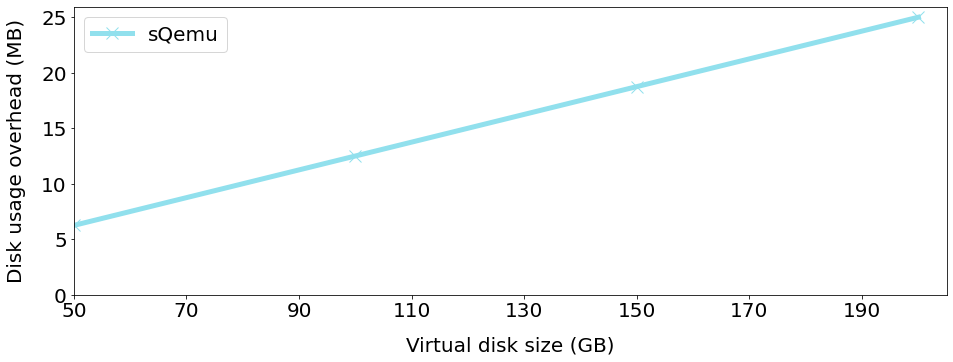

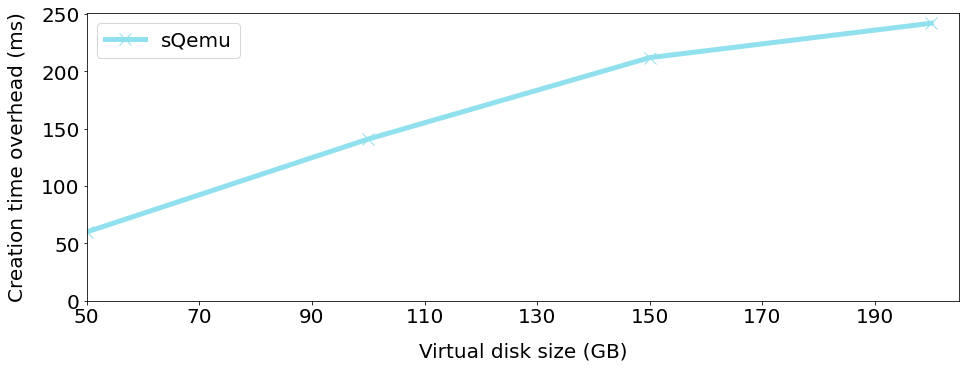

In [368]:
fig = plt.figure(figsize=plt.figaspect(0.33))
ax= fig.add_axes([0,0,1,1])

X=[50, 100, 150, 200]

vals = []
for x in X:
    t = x*131072
    vals += [ t/1024/1024 ]

ax.plot(X, vals, label="sQemu", color=blue, marker="x", linewidth=5, ms=12)
plt.xlim(xmin=50, xmax=205)
plt.xticks(range(50, 200, 20))
plt.ylim(ymin=0)
 # bar here
plt.xlabel("Virtual disk size (GB)")
plt.ylabel("Disk usage overhead (MB)")
plt.legend()
plt.savefig("figs/disk_creation_size.pdf", format="pdf", bbox_inches="tight")

##
## time
##

fig = plt.figure(figsize=plt.figaspect(0.33))
ax= fig.add_axes([0,0,1,1])

X=[50, 100, 150, 200]

vals1 = [10, 15, 21, 23]
vals2 = [70, 156, 233, 265]
vals2 = np.array(vals2) - np.array(vals1)
ax.plot(X, vals2, label="sQemu", color=blue, marker="x", linewidth=5, ms=12)
plt.xlim(xmin=50, xmax=205)
plt.xticks(range(50, 200, 20))
plt.ylim(ymin=0)

plt.xlabel("Virtual disk size (GB)")
plt.ylabel("Creation time overhead (ms)")
plt.legend()
plt.savefig("figs/disk_creation_time.pdf", format="pdf", bbox_inches="tight")